### *In this tutorial I am using LSTM-RNN to predict the prices of Google Stocks from Google Stock Data (August 2004 to September 2020)*

***The dataset consists of 7 columns which contain the date, opening price, highest price, lowest price, closing price, adjusted closing price and volume of share for each day.***


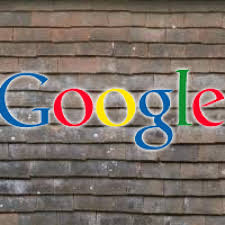

## ***Data Processing***

### Importing the libraries

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

### Loading the data

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [ ]:
stock_data = pd.read_csv('/kaggle/input/google-data-historic-dataset/GOOGL.csv')

In [ ]:
stock_data.head()

In [ ]:
# Shape of the data
stock_data.shape

### Creating the data in suitable format to feed to our LSTM model

In [ ]:
# Making training and test data
data_training = stock_data[stock_data['Date']<'2019-01-01'].copy()
data_test = stock_data[stock_data['Date']>='2019-01-01'].copy()

# This will sound confusing right now. Just wait.
data_train = data_training.copy()

In [ ]:
# Dropping 'Date' and 'Adj Close'
data_training = data_training.drop(['Date', 'Adj Close'], axis = 1)

In [ ]:
print(data_training.shape)
print(data_test.shape)

### Feature scaling
Let's do some scaling on the data to convert it into a similar scale.
Here, I am using Min-Max Scaler, you can do other scaling techniques as well.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

In [ ]:
# Scaling the training data
data_training = sc.fit_transform(data_training)

In [ ]:
data_training

### Splitting training_data into X_train and y_train
We are going to train the model on data of 60 days at a time. So the code mentioned below divides the data into chunks of 60 rows.

In [ ]:
X_train = []
y_train = []

for i in range(60, data_training.shape[0]):
    X_train.append(data_training[i-60:i])
    y_train.append(data_training[i, 0])
    
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
print(X_train.shape)
print(y_train.shape)

As we can see X_train now consists of 3557 chunks of data having 60 lists each and each list has 5 elements which correspond to the 5 attributes in the dataset.

## ***Building the RNN***

### Importing keras libraries

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

### Initializing the RNN

In [ ]:
regressor = Sequential()

In [ ]:
regressor = Sequential()

regressor.add(LSTM(units = 60, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 5)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 120, activation = 'relu'))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

In [ ]:
regressor.summary()

### Compiling the RNN

In [ ]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

### Fitting the RNN to the training set

In [ ]:
regressor.fit(X_train, y_train, epochs = 50, batch_size = 32)

## ***Making the predictions and visualizing the results***

### Prepare test data

In [ ]:
data_test.head()

past_60_days contains the data of the past 60 days required to predict the opening of the 1st day in the test data set.

In [ ]:
past_60_days = data_train.tail(60)

We are going to append data_test to past_60_days and ignore the index of data_test and drop Date and Adj Close.

In [ ]:
df = past_60_days.append(data_test, ignore_index = True)
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

In [ ]:
# Scaling test data
inputs = sc.transform(df)
inputs

In [ ]:
X_test = []
y_test = []

for i in range(60, inputs.shape[0]):
    X_test.append(inputs[i-60:i])
    y_test.append(inputs[i, 0])

X_test, y_test = np.array(X_test), np.array(y_test)
X_test.shape, y_test.shape

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
sc.scale_

In [ ]:
scale = 1/8.18605127e-04
scale

In [ ]:
y_pred = y_pred*scale
y_test = y_test*scale

In [ ]:
# Visualising the results
plt.figure(figsize=(14,5))
plt.plot(y_test, color = 'red', label = 'Real Google Stock Price')
plt.plot(y_pred, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

Do upvote if you liked this notebook